In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low = -90.000, high = 90.000, size = 1500)
lngs = np.random.uniform(low = -180.000, high = 180.000, size = 1500)

# Pack the latitudes and longitudes together.
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

46.59062313031026 73.4134210809454
-11.053217074859973 -142.7246656055765
-1.3316731951633045 155.0805426956802
68.91966710937521 -177.238362099134
-43.30951173664987 -96.54079826825954
-89.5417218329748 61.75042936787534
11.689313663005251 -25.74649356915998
-68.0413542747775 -128.05059326233618
-32.83911738854228 -8.510408412231442
25.862341191493655 -63.70786575446769
-71.5259357825102 -64.52490174250444
-71.28652008801716 -131.62753223702907
-85.94984238847941 100.88358994804679
67.44830930361763 86.79440653399212
-63.26465176619165 -112.21653278502912
26.317218109971336 173.15631532006222
-81.44618142169087 -176.58859636505596
1.0757702717933597 -105.48955182568754
33.64282549598029 116.30387067694448
78.56653017310299 -128.0509801274862
46.692068882665126 -172.1884080228589
5.777398460467936 129.46275510247625
-17.496823687261326 -63.75829709959423
-15.455615702570782 31.76233644743172
65.3786955870113 -9.662625327384347
14.723050080921467 141.5486641016562
-66.65754115647175 -10

71.37918679903936 75.2836610634003
-0.017498779058939817 -125.24777377218481
-65.62267710348429 87.65770940824086
-6.365340107175001 125.52108252364553
12.292875536520938 -74.06392620031063
18.661556454707295 -60.27231317421334
-61.379644138703725 -121.76345573238117
-22.03907814796527 13.088169897997233
7.492869787106514 -109.69198827710917
-86.54948311882853 -42.76636494690956
-6.552847627422665 -8.879250843961927
73.61111343459518 -161.64776189307975
64.37279984427389 48.91327126335307
58.81287650919134 119.43444867604177
38.05783982791198 -20.37923739455462
58.629925522329245 155.77897891500214
61.937413715172596 -124.96473162960686
17.444264999085803 -100.66664772290916
-56.8286019567143 176.2072868524359
14.774239894899424 -127.09339243083423
-85.35859020351496 163.6069640882468
17.4443847393877 -52.182569362379894
-84.91244495479441 155.5141998826379
57.209291003340695 55.48673477204605
-54.385025459132834 -140.778571786601
18.916132496842778 148.32350466206424
52.32320905890776

-74.66314219910022 21.186546885612074
58.070373694909875 -99.86363549552084
-34.49911876450918 -97.08897270580057
86.27844021352661 41.1789929306982
2.921441744029721 -67.97804416700815
-1.6525397620826823 0.7080378067740867
-4.736879496474586 18.368809416499403
-81.75334274186348 -170.88440705537076
69.92287882931222 -68.8591434268655
9.016191266722274 6.656791495296375
7.733397217870177 160.52343024300342
-66.25239548909218 -59.860211638835324
-85.98716829543382 144.60270290756006
-84.54998450553217 6.831041980615339
-13.281535994428395 -123.30783606542619
60.338619522909 -124.4091568579328
39.97055266285918 41.987247135223726
-48.92179688519694 42.6345555934046
-12.505068791825707 -95.36521085224244
-65.83942531791148 84.52579540360091
-83.04747935166674 98.05160423689364
-84.65500847918152 3.7539537912115293
-37.352503328839425 10.233210934361267
74.39945144268398 142.76271537819332
74.18144383487831 -35.37334973335044
6.658237971890543 -113.7711153250684
43.88998484245553 -152.942

24.18438348996473 -28.951090891677893
-64.39527454929882 83.77484800124387
27.74323729523617 21.02327668033996
-29.15197169752323 -159.30935819022847
-20.234102599355538 43.34369221817647
31.47730677706882 88.35994367085044
-7.096710551174766 176.36126915651778
-30.68441955641383 89.99862583166674
-7.06700693010437 -106.13813767912775
78.11043640435773 -30.265765640570976
61.84719839622167 75.79555318692408
-81.61424435852825 144.61840338774687
74.32412114719085 101.32801350629586
4.070306610235207 -121.16392729981281
36.02395941013886 51.23724497894898
86.1032534813541 160.0175413664645
-4.063193632122548 0.08786292687841524
55.52362538448995 133.62263167661996
10.202131788454395 169.07274580407022
69.78121823021732 76.92131747004049
80.21279717274379 -164.64487971536562
14.296368508892016 149.61556425219834
10.138657026840264 -4.520592114150475
-10.4240958577807 -136.47217731130752
7.201858136797739 177.15051141211927
-79.51604039268548 156.97733836833277
-6.170199987829534 118.18247

29.127651790333957 -135.92841611175015
45.276184977446036 -45.787120831324984
69.52439320089078 78.50381913843029
61.138366819872715 -10.495909611750335
-42.86298335691526 119.3164756351959
-88.26632149655333 -130.83707411707482
-88.05327202146083 -160.82554589835763
-88.52600971922169 -145.99031349231672
-49.794603196971885 160.26765065097032
37.84635113899701 56.22591586987613
22.860269515279256 74.50299979608619
3.8917440714676275 69.46771736077775
-84.41268424447708 70.63409815227612
-13.858694173204157 127.10435916581741
84.81719265941874 69.01798066554383
-10.869314331769374 -75.28130070861874
14.06308934456824 105.77715870286534
-55.443775221124724 120.41015417289293
-41.027067501594146 -85.849111124735
9.736235699027432 174.26624546212832
46.16879455183641 178.85959335539724
-3.884931557341446 12.722388350283609
-33.20821710985954 -44.19425358621805
-86.51205273260237 62.77259616742808
47.51745914719453 175.2877653878499
70.37579662518098 106.5376479471816
17.908364623595347 13

In [5]:
# Import the citipy module.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

598

In [7]:
# Import requests.
import requests

# Import the API key.
from config import weather_api_key

# Set up the starting URL for Weather Map API Call.
url = f"https://api.openweathermap.org/data/2.5/weather?appid=" + weather_api_key

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Increment the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime("%Y-%m-%d %H:%M:%S")
        
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        
    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Tally up the city count.
print(f"{len(city_data)} cities have been recorded.")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saryshagan
City not found. Skipping...
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | namatanai
Processing Record 4 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 5 of Set 1 | castro
Processing Record 6 of Set 1 | east london
Processing Record 7 of Set 1 | sao filipe
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | hamilton
Processing Record 11 of Set 1 | ushuaia
Processing Record 12 of Set 1 | albany
Processing Record 13 of Set 1 | igarka
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | butaritari
Processing Record 16 of Set 1 | vaini
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | mengcheng
Processing Record 19 of Set 1 | tuktoyaktuk
Processing Record 20 of Set 1 | bethel
Processing Record 21 of Set 1 | san isidro
Processing Record 2

Processing Record 34 of Set 4 | praia
Processing Record 35 of Set 4 | longyan
Processing Record 36 of Set 4 | pechora
Processing Record 37 of Set 4 | cabo san lucas
Processing Record 38 of Set 4 | rocha
Processing Record 39 of Set 4 | agadir
Processing Record 40 of Set 4 | baijiantan
Processing Record 41 of Set 4 | pevek
Processing Record 42 of Set 4 | luau
Processing Record 43 of Set 4 | plettenberg bay
Processing Record 44 of Set 4 | longyearbyen
Processing Record 45 of Set 4 | kununurra
Processing Record 46 of Set 4 | jishu
Processing Record 47 of Set 4 | belaya gora
Processing Record 48 of Set 4 | kaeo
Processing Record 49 of Set 4 | aswan
Processing Record 50 of Set 4 | hollola
Processing Record 1 of Set 5 | hirara
Processing Record 2 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 3 of Set 5 | neiafu
Processing Record 4 of Set 5 | karlovo
Processing Record 5 of Set 5 | biak
Processing Record 6 of Set 5 | klaksvik
Processing Record 7 of Set 5 | bataraza
City

Processing Record 25 of Set 8 | lesnikovo
Processing Record 26 of Set 8 | puerto madryn
Processing Record 27 of Set 8 | timmins
Processing Record 28 of Set 8 | guozhen
Processing Record 29 of Set 8 | harper
Processing Record 30 of Set 8 | luganville
Processing Record 31 of Set 8 | port keats
Processing Record 32 of Set 8 | waingapu
Processing Record 33 of Set 8 | sitka
Processing Record 34 of Set 8 | mackay
Processing Record 35 of Set 8 | artyk
City not found. Skipping...
Processing Record 36 of Set 8 | narsaq
Processing Record 37 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 38 of Set 8 | vila velha
Processing Record 39 of Set 8 | cassilandia
Processing Record 40 of Set 8 | kruisfontein
Processing Record 41 of Set 8 | crotone
Processing Record 42 of Set 8 | turbat
Processing Record 43 of Set 8 | sentyabrskiy
City not found. Skipping...
Processing Record 44 of Set 8 | faya
Processing Record 45 of Set 8 | tateyama
Processing Record 46 of Set 8 | paamiut
Processin

Processing Record 13 of Set 12 | arlit
Processing Record 14 of Set 12 | porto novo
Processing Record 15 of Set 12 | nhulunbuy
Processing Record 16 of Set 12 | khartoum
Processing Record 17 of Set 12 | lensk
Processing Record 18 of Set 12 | odienne
Processing Record 19 of Set 12 | kaduna
Processing Record 20 of Set 12 | raahe
Processing Record 21 of Set 12 | hamina
Processing Record 22 of Set 12 | auki
Processing Record 23 of Set 12 | kysyl-syr
Processing Record 24 of Set 12 | baran
Processing Record 25 of Set 12 | nyimba
Processing Record 26 of Set 12 | mayo
Processing Record 27 of Set 12 | korla
Processing Record 28 of Set 12 | hualmay
Processing Record 29 of Set 12 | menongue
Processing Record 30 of Set 12 | ossora
Processing Record 31 of Set 12 | yenagoa
Processing Record 32 of Set 12 | fomboni
Processing Record 33 of Set 12 | xichang
Processing Record 34 of Set 12 | karratha
Processing Record 35 of Set 12 | abu dhabi
Processing Record 36 of Set 12 | lake cowichan
Processing Record 

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Atuona,-9.8000,-139.0333,298.40,74,4,7.59,PF,2022-10-12 04:09:38
1,Namatanai,-3.6667,152.4333,302.88,65,76,3.67,PG,2022-10-12 04:09:38
2,Castro,-24.7911,-50.0119,288.79,98,99,2.27,BR,2022-10-12 04:09:39
3,East London,-33.0153,27.9116,292.38,85,95,3.06,ZA,2022-10-12 04:09:40
4,Sao Filipe,14.8961,-24.4956,299.33,79,89,3.14,CV,2022-10-12 04:09:40
5,Rikitea,-23.1203,-134.9692,294.10,80,50,8.86,PF,2022-10-12 04:04:15
6,Jamestown,42.0970,-79.2353,287.92,68,0,3.09,US,2022-10-12 04:05:57
7,Hamilton,39.1834,-84.5333,290.24,62,0,4.12,US,2022-10-12 04:09:19
8,Ushuaia,-54.8000,-68.3000,275.96,81,100,6.17,AR,2022-10-12 04:09:42
9,Albany,42.6001,-73.9662,284.73,87,0,1.63,US,2022-10-12 04:03:55


In [11]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [12]:
# Create the output file (CSV).
output_data_file = os.path.join("weather_data", "cities.csv")

# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label = "City_ID")

In [2]:
# Extract the relevant fields from the DataFrame for plotting.
city_data_df = pd.read_csv(os.path.join("weather_data", "cities.csv"))

lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

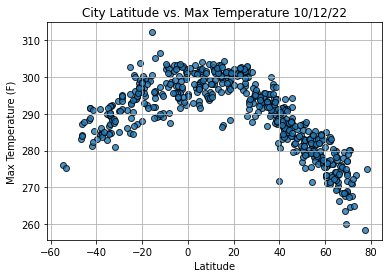

In [3]:
# Import time module.
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

# Save the figure.
output1 = os.path.join("weather_data", "Fig1.png")
plt.savefig(output1)

# Show the plot.
plt.show()

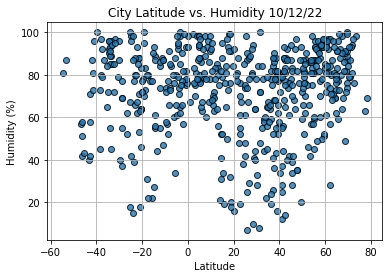

In [4]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Humidity " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure.
output2 = os.path.join("weather_data", "Fig2.png")
plt.savefig(output2)

# Show the plot.
plt.show()

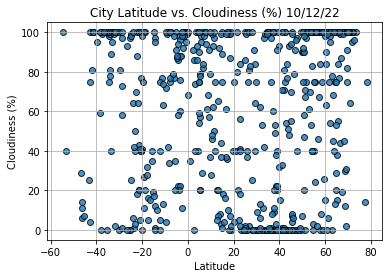

In [5]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure.
output3 = os.path.join("weather_data", "Fig3.png")
plt.savefig(output3)

# Show the plot.
plt.show()

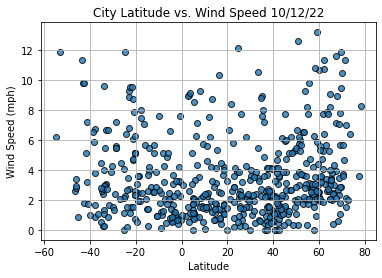

In [6]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor = "black", linewidths = 1, marker = "o",
            alpha = 0.8, label = "Cities")

# Incorporate the other graph properties.
plt.title("City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

# Save the figure.
output4 = os.path.join("weather_data", "Fig4.png")
plt.savefig(output4)

# Show the plot.
plt.show()